## Fractal celular

Este generador de fractales functiona mediante un crecimiento celular parecido al de las plantas. La región de células indiferenciadas desde donde se desarrollan nuevas hojas y tallos en las plantas se conoce como **meristemo**. 

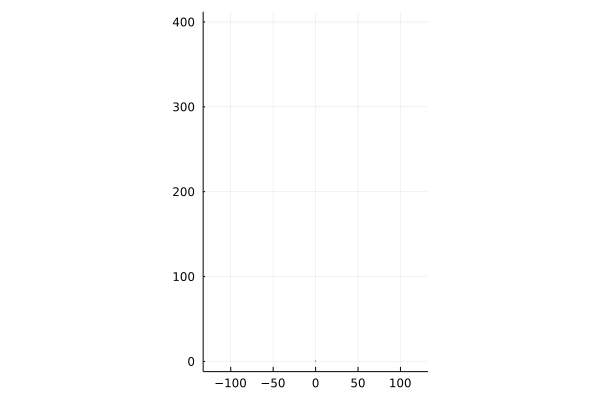

El programa funciona de la siguiente manera:

Un objeto llamado **meristemo** contiene dos contadores, etiquetados como $B$ y $G$, además de una dirección $dir$ y una posición $pos$, ambos vectores bidimensionales.

En cada paso de la simulación, el contador $B$ se reduce en una cantidad $p$, mientras que el contador $G$ se reduce en una cantidad $q$, con $q<p$. El meristemo avanza una distancia fija en la dirección $dir$. El contador $B$ llegará a $0$ más rápidamente que $G$, y cada que esto suceda, el meristemo se bifurca creando nuevos meristemos, cuyas direcciones están determinadas por una rotación de la dirección del meristemo original. En el momento en que el meristemo se bifurca, su dirección puede variar un ángulo dado. El contador $B$ se reestablece al valor de $G$ luego de que el meristemo se bifurca.

Los nuevos meristemos que se generan tienen valores de $B$ y $G$ reducidos por un factor $t$, lo que provoca que su crecimiento se detenga antes que el del meristemo original.

Todos los meristemos se guardan en una lista y en cada iteración se hace evolucionar a todos los meristemos, trazando una linea entre su posición inicial y su posición final. Cada meristemo detiene su crecimiento cuando $G=0$.

El siguiente bloque de código carga las funciones necesarias para crear los fractales:

In [1]:
using LinearAlgebra, Plots, Colors, Images

mutable struct Meristemo
    B::Int
    G::Int
    dir::Vector{Any}
    pos::Vector{Any}
end

function genera_meristemo(B,G,dir,pos)
    Meristemo(B,G,dir,pos)
end

function rot(v,θ) # Rotación de un vector v por un ángulo θ.
   return [v[1]*cosd(θ)-v[2]*sind(θ),v[1]*sind(θ)+v[2]*cosd(θ)] 
end



function ev_meristemo!(M,p,q,t=1,θ=0,angles=[120,-120]) #Evoluciona un meristemo en un paso.
   
    if M.G > 0 #Mientras el contador G sea mayor que 0, el meristemo sigue vivo.
        
        segmento_x = [M.pos[1]] #Guarda en una lista la posición horizontal del meristemo.
        segmento_y = [M.pos[2]] #Guarda en una lista la posición vertical del meristemo.
        M.pos += M.dir #Desplaza al meristemo.
        push!(segmento_x,M.pos[1]) #Guarda en la lista la nueva posición horizontal del meristemo.
        push!(segmento_y,M.pos[2]) #Guarda en la lista la nueva posición vertical del meristemo.
        
        M.G += -q #Se descuenta q del contador G.
        
        if M.B > 0 #Si el contador B es mayor que 0, el meristemo no se bifurca.
            M.B += -p  #El contador B se reduce en p.          
        end
        
        if M.B ≤ 0 #En caso de que el contador B haya llegado a 0, el meristemo se bifurca.
            M.B = M.G #Reestablece el valor de B.
            M.dir = rot(M.dir,θ) #Cambia la dirección del meristemo original en un ángulo θ.
            
            for α ∈ angles
               push!(meristemos,genera_meristemo(Int(floor(M.B*t)),Int(floor(M.G*t)),rot(M.dir,α),M.pos)) #Genera un nuevo meristemo cuyos contadores están reducidos y su dirección rotada un ángulo α. 
            end
            
        end
        
        plot!(segmento_x,segmento_y,label="",color=:green,yrange=[0,G/q],xrange=[-G/2/q,G/2/q],aspect_ratio=:equal) # Traza el segmento que corresponde al movimiento del meristemo.
        
    end

end

ev_meristemo! (generic function with 4 methods)

### El siguiente ejemplo muestra una estructura similar al Triángulo de Sierpinski:

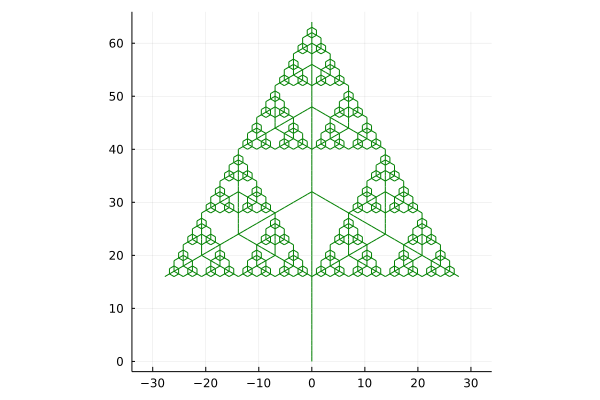

In [2]:
p = 2
q = 1
t = 1
B = 64
G = 64
θ = 0
α = 120
β = -120



plot()

meristemos = [genera_meristemo(B,G,[0.0,1.0],[0.0,0.0])]

for i in 1:G
    for M ∈ meristemos
       ev_meristemo!(M,p,q,t,θ,[α,β]) 
    end
end

plot!(yrange=[0,G/q],xrange=[-G/2/q,G/2/q],aspect_ratio=:equal)

Aquí, el factor $t$ se eligió igual a 1, de forma que todos los nuevos meristemos recorren la misma distancia que el meristemo madre luego de bifurcarse. En caso de disminuir el valor de $t$, se obtiene el efecto siguiente:

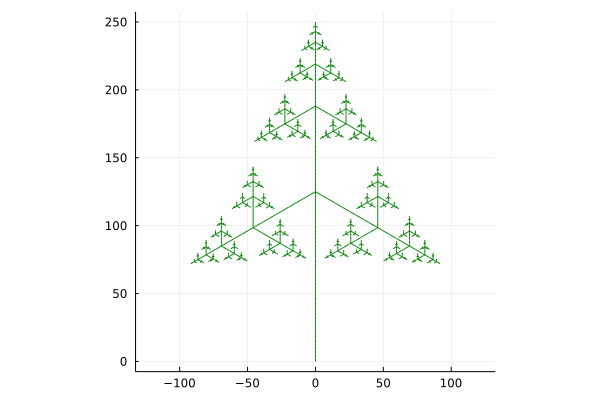

In [3]:
p = 2
q = 1
t = 0.85
B = 250
G = 250
θ = 0
α = 120
β = -120



plot()

meristemos = [genera_meristemo(B,G,[0.0,1.0],[0.0,0.0])]

for i in 1:G
    for M ∈ meristemos
       ev_meristemo!(M,p,q,t,θ,[α,β]) 
    end
end

plot!(yrange=[0,G/q],xrange=[-G/2/q,G/2/q],aspect_ratio=:equal)

Se observa que la longitud de las ramas laterales disminuye con respecto a la rama principal, lo cual se repite en cada iteración, creando algo de espacio entre las ramas y alterando la forma del fractal.

## Helecho

Jugando con la razón $p:q$ podemos obtener diversas formas. Esa es la razón de la distancia restante de una rama a la que el meristemo se bifurca. La siguiente forma asemeja la hoja de un helecho, que se bifurca por primera vez a 1/7 del camino:

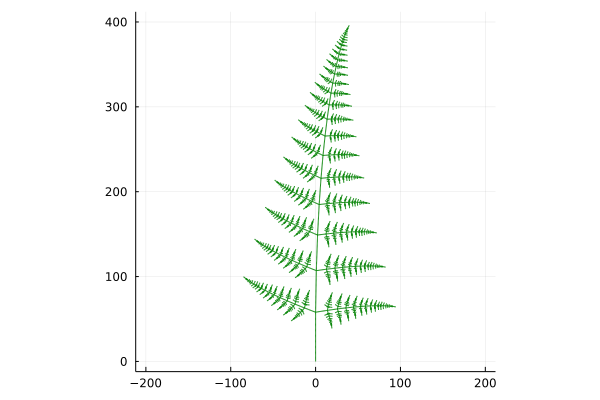

In [4]:
p = 7
q = 1
t = 0.28
B = 400
G = 400
θ = -1
α = 70
β = -80

plot()

meristemos = [genera_meristemo(B,G,[0.0,1.0],[0.0,0.0])]

for i in 1:G
    for M ∈ meristemos
        ev_meristemo!(M,p,q,t,θ,[α,β]) 
    end
end

plot!(yrange=[0,G/q],xrange=[-G/2/q,G/2/q],aspect_ratio=:equal)

## Animación

El siguiente bloque de código creará una animación del crecimiento del fractal:

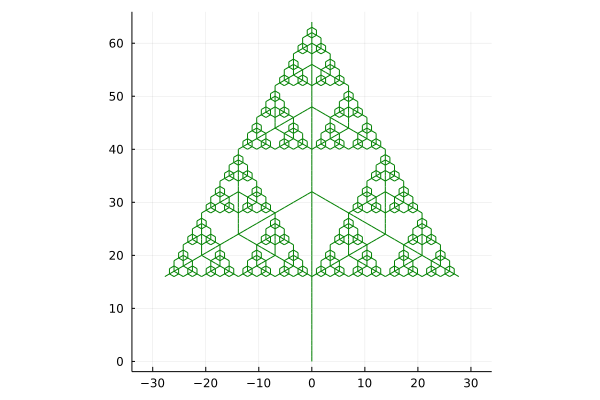

┌ Info: Saved animation to 
│   fn = C:\Users\Mauricio\Documents\Facultad de Ciencias\7mo semestre parte 2 (8vo)\Vida artificial\Fractal celular\anim_sierpinsky.gif
└ @ Plots C:\Users\Mauricio\.julia\packages\Plots\5kcBO\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Mauricio\\Documents\\Facultad de Ciencias\\7mo semestre parte 2 (8vo)\\Vida artificial\\Fractal celular\\anim_sierpinsky.gif")
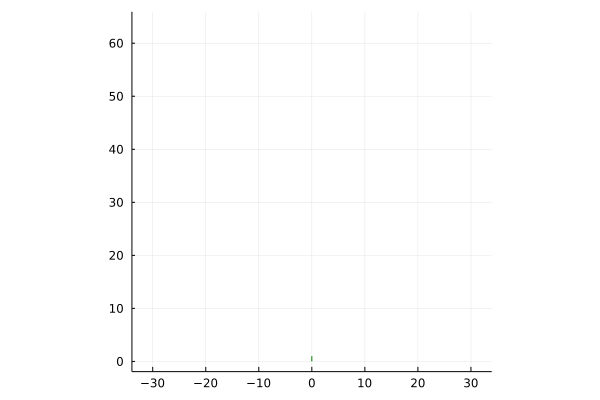

In [5]:
p = 2
q = 1
t = 1
B = 64
G = 64
θ = 0
α = 120
β = -120


plot()

meristemos = [genera_meristemo(B,G,[0.0,1.0],[0.0,0.0])]

anim_sierpinsky = @animate for i in 1:G+30
    for M ∈ meristemos
       ev_meristemo!(M,p,q,t,θ,[α,β]) 
    end
    plot!(show=:ijulia,yrange=[0,G/q],xrange=[-G/2/q,G/2/q],aspect_ratio=:equal)
end

gif(anim_sierpinsky,"anim_sierpinsky.gif",fps=20)